
Reference: OMKAR MODI https://www.kaggle.com/omkarmodi/inceptionv3-feature-extraction/notebook

Reference: OMKAR MODI https://www.kaggle.com/omkarmodi/alexnet


CNN Model - AlexNet

In [ ]:
#This Program imports a dataset obtained from Kaggle
#https://www.kaggle.com/aryashah2k/breast-ultrasound-images-dataset
#It then classifies the Ultrasound Images as benign, malignant, or normal

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [ ]:
pip install openpyxl

In [ ]:
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Dataset
path = "drive/MyDrive/EE258 Project/Dataset_BUSI_with_GT"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict 

{'benign': 891, 'malignant': 421, 'normal': 266}

In [ ]:
import re
def clean(name):
    name = re.sub('[benign ().p]','',str(name))
    return name

In [ ]:
#organize dataframe
df = pd.DataFrame(os.listdir(dir_list[0]))
df = df[0].apply(clean)
df = df[~df.str.contains('mask',regex =False)]

df_list = list(df)
type(df_list)
df_list.sort()
print(len(df_list))

133


In [ ]:
#set image size
img_size = 128
img_channel = 3
#sets X as a blank matrix of zeros
#y is the actual matrix of the images
X_b , Xm_b , y_b = np.zeros((437,img_size,img_size,img_channel)) , np.zeros((437,img_size,img_size,img_channel)) , np.full(437,'benign') 
X_n , Xm_n , y_n = np.zeros((133,img_size,img_size,img_channel)) , np.zeros((133,img_size,img_size,img_channel)) , np.full(133,'normal') 
X_m , Xm_m , y_m = np.zeros((210,img_size,img_size,img_channel)) , np.zeros((210,img_size,img_size,img_channel)) , np.full(210,'malignant')

In [ ]:
#this block pairs the maked with the ultrasound image

img1_path = os.path.join(os.path.join(path,'benign'),os.listdir(os.path.join(path,'benign'))[1])

pil_img = load_img(img1_path,color_mode = 'rgb',target_size=(img_size,img_size))
img = img_to_array(pil_img)
img_shape = img.shape
print(img_shape)

def img_num(filename):
    
    val = 0
    #this loop looks for image numbers and matches Ultrasound image with masked image
    for i in range(len(filename)) :
        if filename[i] == '(' :
            while True :
                i += 1
                if filename[i] == ')' :
                    break
                val = (val*10) + int(filename[i])
            break
    
    return val
#separates ultrasound and masked images
for tumor_path in dir_list :
    for image in os.listdir(tumor_path) :
        p = os.path.join(tumor_path, image)
        pil_img = load_img(p,color_mode = 'rgb',target_size=(img_size,img_size))         # read image as grayscale and resize it
        
        if image[-5] == ')' :                                   #if real image 
            #Ultrasound images
            if image[0] == 'b' :
                X_b[img_num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                               # to X as benign , normal
                X_n[img_num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[img_num(image)-1]+= img_to_array(pil_img)
        else :                                                 #else masked image
            #masked image
            if image[0] == 'b' :
                Xm_b[img_num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                               # mask to y.
                Xm_n[img_num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                Xm_m[img_num(image)-1]+= img_to_array(pil_img)

(128, 128, 3)


(780, 128, 128, 3)
(780, 128, 128, 3)
(780,)
1.0
0.0


In [ ]:
#COPY
#combining sorted images into matricies
X = np.concatenate((X_b, X_n, X_m), axis = 0) #combining real images into real image matrix {real_b, real_n, real_m}
Xm = np.concatenate((Xm_b, Xm_n, Xm_m), axis = 0) #masked array

#0 is black, 255 is white

y = np.concatenate((y_b, y_n, y_m), axis = 0) #lables
#look at the shapes
print(X.shape)  #Ultrasound image matrix
print(Xm.shape) #masked image matrix
print(y.shape)  #actual 

#look at the max and min values
print(X.max())
print(X.min())
print(Xm.max())
print(Xm.min())

#normalize to max value
X /= 255.0

#normalize mask to max value
Xm /= 510.0

#combine Ulatrasound Image with Mask
X_combined=X*Xm

#check new max and min values
print(X.max())
print(Xm.min())
print(X_combined.max())
print(X_combined.min())
#check type
type(y)

(780, 128, 128, 3)
(780, 128, 128, 3)
(780,)
255.0
0.0
510.0
0.0
1.0
0.0
0.5
0.0


numpy.ndarray

***Display Some Images - Data Visualization***

Ultrasound Benign Image


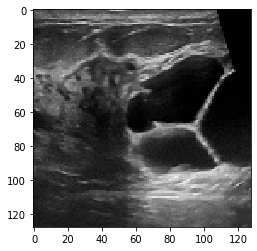

In [ ]:
plt.imshow(X[83], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Ultrasound Benign Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mask of Benign Image


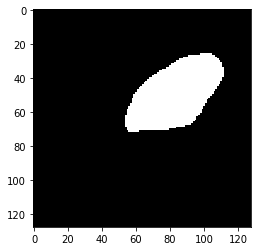

In [ ]:
plt.imshow(Xm_b[83], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Mask of Benign Image')

Combined Images


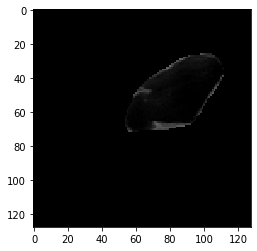

In [ ]:
plt.imshow(X_combined[83], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Combined Images')

Ultrasound Normal Image


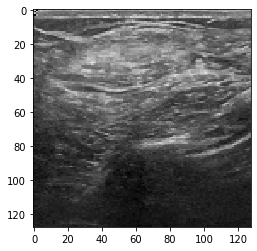

In [ ]:
plt.imshow(X[438], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Ultrasound Normal Image')

Mask of Normal Image


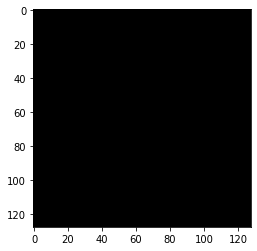

In [ ]:
plt.imshow(Xm_n[1], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Mask of Normal Image')

Combined Normal Image


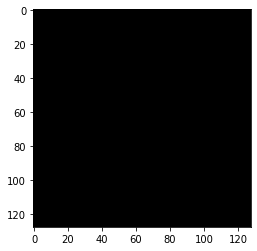

In [ ]:
plt.imshow(X_combined[438], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Combined Normal Image')

Ultrasound Malignant Image


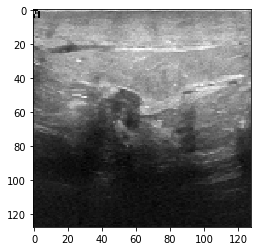

In [ ]:
plt.imshow(X[575], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Ultrasound Malignant Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mask of Malignant Image


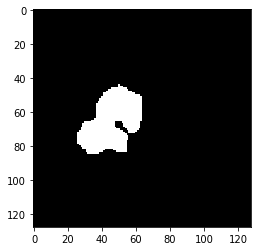

In [ ]:
plt.imshow(Xm_m[5], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Mask of Malignant Image')

Combined Malignant Image


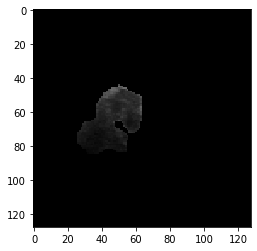

In [ ]:
plt.imshow(X_combined[575], cmap=plt.cm.binary, interpolation= 'nearest')
plt.show
print('Combined Malignant Image')

{'malignant': 210}
{'benign': 437}
{'normal': 133}


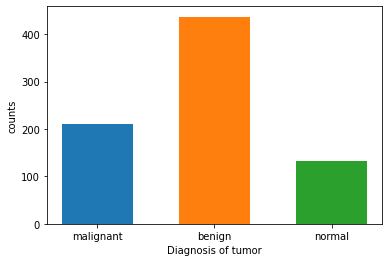

In [ ]:
#Plot Bar Graph

digit_train, counts_train = np.unique(y_m, return_counts = True)
digit_train1, counts_train1 = np.unique(y_b, return_counts = True)
digit_train2, counts_train2 = np.unique(y_n, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train)

distribution_train1 = dict(zip(digit_train1, counts_train1))
print(distribution_train1)

distribution_train2 = dict(zip(digit_train2, counts_train2))
print(distribution_train2)

plt.bar(list(distribution_train.keys()),distribution_train.values(),width=0.6)
plt.bar(list(distribution_train1.keys()),distribution_train1.values(),width=0.6)
plt.bar(list(distribution_train2.keys()),distribution_train2.values(),width=0.6)
plt.xlabel('Diagnosis of tumor')
plt.ylabel('counts')
plt.show()

***Baseline Model***

In [ ]:
#Test Train Split
#test train split is 3/20 (0.15) 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#convert to Sparce Matrix
encoder  = OneHotEncoder() 
y=encoder.fit_transform(y.reshape(y.shape[0],1)) 

# Ultrasound image 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,shuffle=True,random_state=42)

#combined images
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_combined,y,test_size = 0.15,shuffle=True,random_state=42)

#Masked image
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,y,test_size = 0.15,shuffle=True,random_state=42,stratify=y.toarray())

class_list = encoder.categories_ 
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(Xm_train.shape,Xm_test.shape)
print(ym_train.shape,ym_test.shape)
type(y) #check type of y

(663, 128, 128, 3) (117, 128, 128, 3)
(663, 3) (117, 3)
(663, 128, 128, 3) (117, 128, 128, 3)
(663, 3) (117, 3)


scipy.sparse.csr.csr_matrix

In [ ]:
#AlexNet Model
#Reference: https://www.kaggle.com/omkarmodi/alexnet

from sklearn.metrics import f1_score,roc_auc_score,cohen_kappa_score

#function for evaluating the model's metrics
def evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history):
    train_loss , train_acc = model.evaluate(X_train,y_train.toarray())
    val_loss, val_acc = model.evaluate(X_val,y_val.toarray())
    test_loss_value , test_accuracy = model.evaluate(X_test, y_test.toarray())
    y_pred = model.predict(X_test)
    y_pred_label = np.argmax(y_pred,axis=1)
    y_true_label = np.argmax(y_test,axis=1)
    f1_measure = f1_score(y_true_label,y_pred_label,average='weighted')
    roc_score = roc_auc_score(y_test.toarray(),y_pred)
    kappa_score = cohen_kappa_score(y_true_label,y_pred_label)
    print("Train accuracy = "+str(train_acc))
    print("Validation accuracy = "+str(val_acc))
    print('Test accuracy = ' + str(test_accuracy))
    print('Train Loss = ' + str(train_loss))
    print('Validation Loss = ' + str(val_loss))
    print('Test Loss = ' + str(test_loss_value))
    print("F1-Score = "+str(f1_measure))
    #print("KAPPA = "+str(kappa_score))
    #print("roc_area = "+str(roc_score))

In [ ]:
#Function for making a training validation plot

import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Function for training the model
def fit_evaluate(model,X_train,y_train,X_test,y_test,bs,Epochs,patience):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=patience,restore_best_weights=True, verbose=1)
                                                                     #play with test size --> was 0.1
    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = y_train.toarray())#***************
    history = model.fit(X1_train,y1_train.toarray(),batch_size = bs,epochs=Epochs,validation_data = (X_val,y_val.toarray()), callbacks=[es])#*****************
    evaluation(model,X1_train,y1_train,X_val,y_val,X_test,y_test,history)
    Train_Val_Plot(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

In [ ]:
#AlexNet Model Function

def AlexNet():

   # L2 Regulatization
    layer = keras.layers.Dense(1000, activation="elu",
                           kernel_initializer="he_normal",          #smaller lambda than this makes model worse
                           kernel_regularizer=keras.regularizers.l2(0.00000001)) #was l1_l2 changed to l2 for more accurate model
    
    AlexNet = Sequential()

    #1st Convolutional Layer
    AlexNet.add(Conv2D(filters=96, input_shape=img_shape, kernel_size=(11,11), strides=(4,4), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    

    #2nd Convolutional Layer
    AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #3rd Convolutional Layer
    AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #4th Convolutional Layer
    AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #5th Convolutional Layer
    AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Passing it to a Fully Connected layer
    AlexNet.add(Flatten())
    # 1st Fully Connected Layer 4096 neurons
    AlexNet.add(Dense(4096, kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.00000001), input_shape=(32,32,3,))) 
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    AlexNet.add(Dropout(0.4)) #best dropout rate 0.4

    #2nd Fully Connected Layer with 4096 neurons
    AlexNet.add(Dense(4096,kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.00000001))) 
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4)) #best dropout rate 0.4

    #3rd Fully Connected Layer with 1000 neurons
    AlexNet.add(Dense(1000,kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.00000001) ))  #play with lambda number was origonally 0.01
    AlexNet.add(BatchNormalization())                              #0.00000001 best value yet
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4)) #best dropout rate 0.4
   

    #Output Layer
    AlexNet.add(Dense(3))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('softmax'))  #softmax output
    
    AlexNet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    
    return AlexNet

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_28 (Bat  (None, 16, 16, 256)     

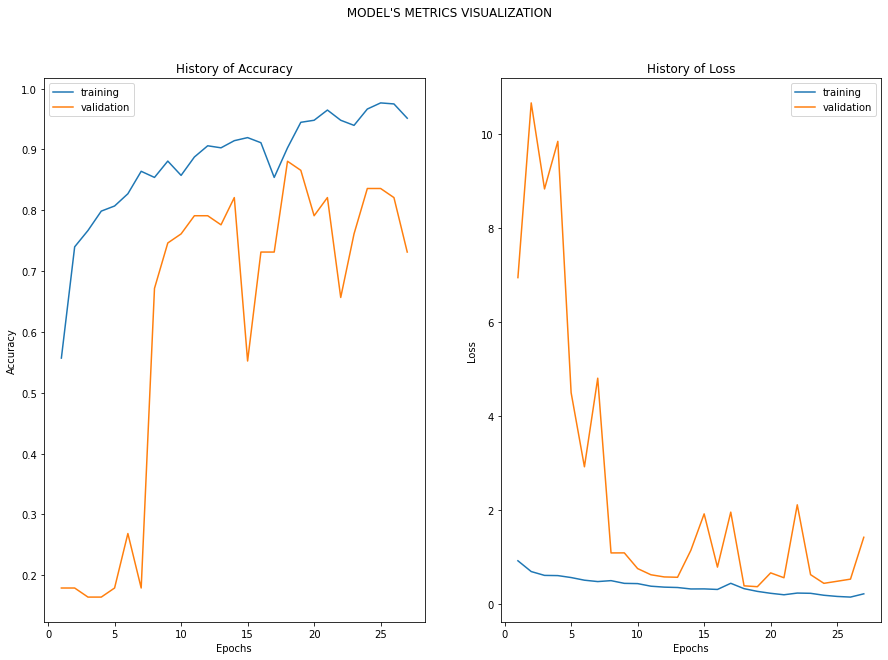

In [ ]:
#Training the model with the combined images
model = AlexNet()
model.summary()
                               # batch size=16, #epochs=60, patience=8
fit_evaluate(model,X_train_c,y_train_c,X_test_c,y_test_c,16,60,8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
import numpy as np

y_proba = model.predict(X_test_c) 
y_pred = np.argmax(y_proba,axis=1)

rounded_labels=np.argmax(y_test_c, axis=1)
rounded_labels[1]
print('Confusion Matrix')
print(confusion_matrix(y_pred, rounded_labels))
print('   b, m, n')

Confusion Matrix
[[55 13  0]
 [ 2 24  0]
 [ 1  0 22]]
   b, m, n
